## Preliminary Code

The needed libaries are imported, visualization conventions are specified, the data is read and stored in a dataframe, and some initial analyses of the data are carried out.

In [254]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
%matplotlib inline

In [255]:
plt.style.use('seaborn-darkgrid')

In [256]:
df = pd.read_csv('vgsales.csv')

In [257]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [258]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Data Preparation

The distribution of null values in the dataset is examined.

In [259]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [260]:
df.shape

(16598, 11)

<b>Null values:</b> Both the "Year" and "Publisher" columns contain null values, making them subject to removal. Since replacing these cells with null-equivalent values would alter the information they convey (i.e., all video games have a release year and publisher, so values such as 0 or "none" would be incorrect), buffer values cannot be used to resolve the issue. However, as removing these entire columns would restrict the analyses that can be done on the data, such as finding trends in sales over time or determining prolific game publishers, the columns were retained. 

Moreover, when examining the number of null values of the two columns over the total number of data in the dataset (which was retrieved using the shape method), it is evident that these rows with null values only make up a small portion of the data; only about 1.6% and 0.3% of the data have null years and publishers, respectively. Thus, removing the rows with null values, instead of the entire columns themselves, appears to be the better data cleaning approach, as this would minimize the amount of data to be removed while still allowing for the examination of a broader scope of possible correlations. 

In [261]:
clean_df = df.dropna()

<b>Numerical values:</b> Though the years in which the games are released should only contain whole numbers, they are currently stored as floats in the dataframe. The values under the "Year" column are converted to integers for cleaner data analysis and visualization.

In [263]:
clean_df.loc[:,'Year'] = clean_df.loc[:,'Year'].astype('int64')

Next, the unique values of the columns are checked for encoding errors or obvious outliers, using the following statements:

In [264]:
clean_df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

In [265]:
clean_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [266]:
clean_df['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017], dtype=int64)

In [267]:
clean_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [268]:
clean_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

Though the complete data for some of the columns could not be displayed due to the sheer amount of unique values, there did not appear to be any data that needed additional cleaning, such as duplicates or typos.

Outliers and potential errors for the numerical data (i.e., "Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales, and "Total_Sales") are checked from the statistical description of the dataset. Though the entries under the "Year" column are also numerical, these are not used as numerical values in the data analysis and visualization.

In [269]:
clean_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The numerical data, based on the statistical description, all appear to be within the expected ranges of values (i.e., there are no negative values or notable outliers).

## Data Analysis

For a preliminary descriptive analysis, the shape of the dataframe and the column names are examined (preliminary analyses that have been done as part of the data preparation stage are omitted to avoid redundancy). 

In [270]:
clean_df.shape

(16291, 11)

After the data preparation phase, the dataframe is composed of over 16000 rows and 11 columns.

In [271]:
clean_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

The data in the set (as specified by the column names) includes the ranks and names of the video games, their respective platforms, years released, genres, publishers, and their respective sales, which are divided into five categories: sales in North America, sales in Europe, sales in Japan, sales in the rest of the world, and global sales.

The games with the highest amounts of total sales are already evident in the dataset, as their ranks were determined based on this metric; thus, displaying the head of the dataset may reveal some trends and correlations among the data.

In [272]:
clean_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


The top 10 best-selling games around the world were all published by Nintendo. Half of these games were developed for the Wii, but no other trends in their genres or years published can be surmised from these ten entries alone.

Other notable trends may appear upon the examination of the list of games with the highest sales per region.

In [273]:
sorted_df = clean_df.sort_values('NA_Sales', ascending = False)
sorted_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


Majority of the top 10 best-selling games in North America were Nintendo games created for the Nintendo Wii, though there were no other notable commonalities in their platforms or genres.

In [274]:
sorted_df = clean_df.sort_values('EU_Sales', ascending = False)
sorted_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


Similarly, the best-selling games in Europe were also Nintendo games developed for the Wii. Additionally, majority of these games were published between 2005 and 2013, with the exception of Pokemon Red and Blue for the GameBoy.

In [275]:
sorted_df = clean_df.sort_values('JP_Sales', ascending = False)
sorted_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


In contrast to the earlier trends, the best-selling games in Japan were mostly GameBoy and DS games (albeit still developed by Nintendo). Moreover, over half of these best-selling games were role-playing games; notably, the Pokemon franchise accounted for half of these entries.

In [276]:
sorted_df = clean_df.sort_values('Other_Sales', ascending = False)
sorted_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
348,349,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


Similar to the other data, most best-selling games from other parts of the world were also published by Nintendo, and almost half of these were developed for the Wii. Moreover, half of the top 10 best sellers were racing and sports games, and all of them were released from 2004 to 2013.

Next, correlations spanning the entire dataset are examined. First, the number of games published per platform are examined and displayed as a bar graph to better facilitate the preliminary visualization.

<b>N.B.</b> For the rest of the section, horizontal bar graphs are used to produce quick visualizations of the data to aid in the descriptions of their emergent trends, if any. The creation of proper visualizations that properly convey the characteristics of the data is done in the succeeding data visualization section.

In [277]:
clean_df.Platform.value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Text(0, 0.5, 'Platform')

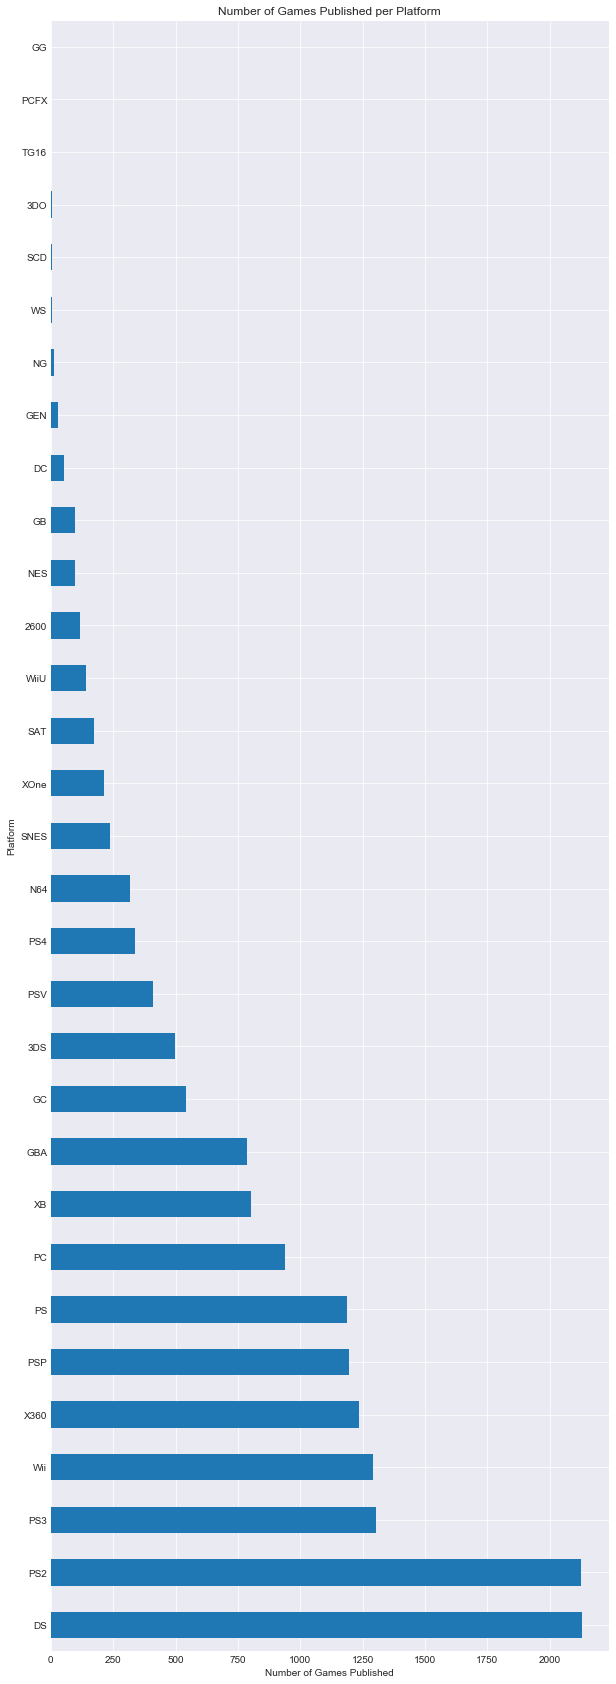

In [278]:
ax = clean_df.Platform.value_counts().plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Number of Games Published per Platform")
ax.set_xlabel("Number of Games Published")
ax.set_ylabel("Platform")

While majority of the best-selling games per region, and even the best-selling games globally, featured Wii titles, the platforms with the largest numbers of best-selling games were actually the DS and the PS2, with other platforms such as the PS3, Wii, and X360 filling in the succeeding three places. Among these top five platforms, the DS is the only handheld platform, while the PS, Wii, and X360 systems are home video game consoles.

Next, the number of games published per genre are examined and visualized.

In [280]:
clean_df.Genre.value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

Text(0, 0.5, 'Genre')

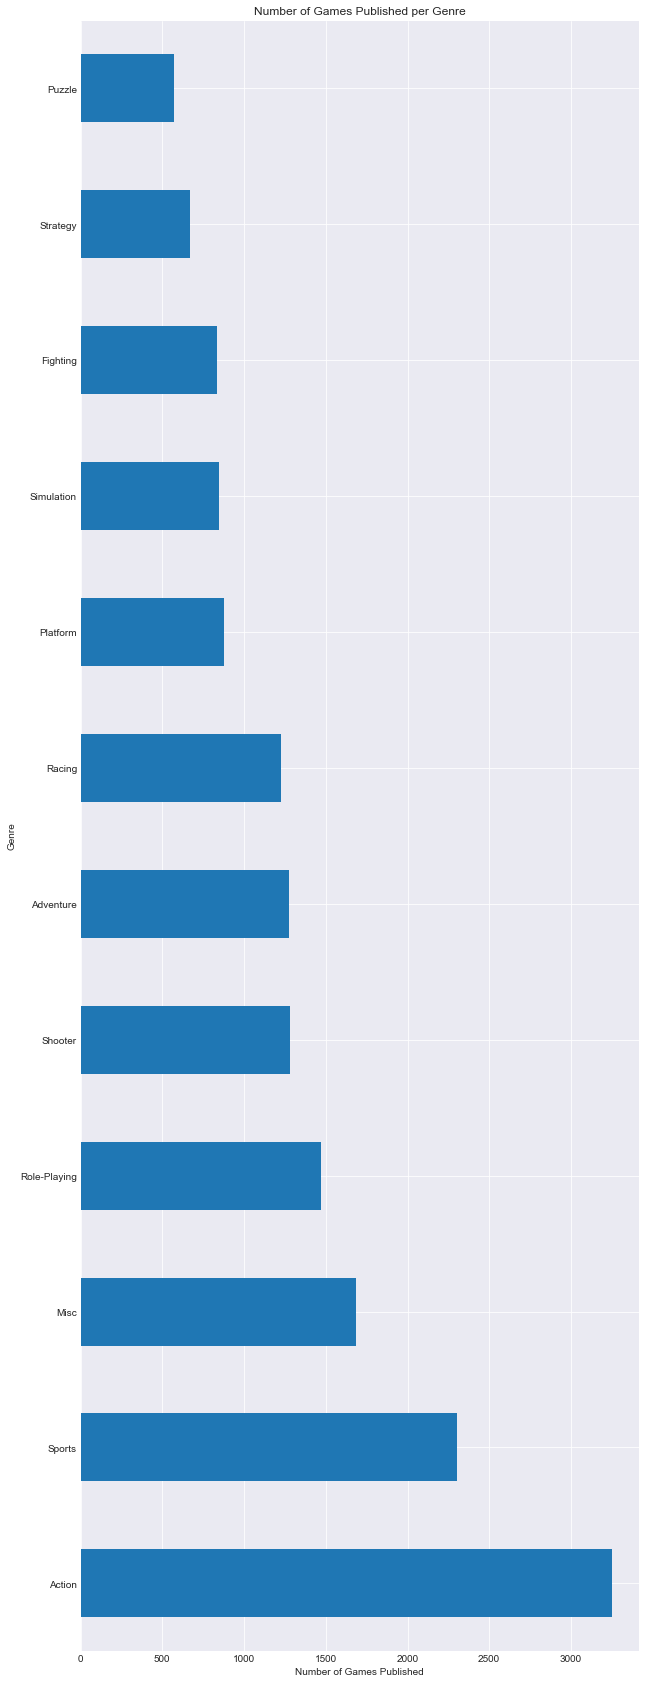

In [281]:
ax = clean_df.Genre.value_counts().plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Number of Games Published per Genre")
ax.set_xlabel("Number of Games Published")
ax.set_ylabel("Genre")

Action games had the highest number of best-selling published titles, with a significant lead over other genres such as sports, miscellaneous titles, and role-playing games. Although the examination of the top ten best-selling titles in Japan earlier showed that role-playing games had the highest sales, this trend did not hold over the entire dataset.

The number of games per publisher are then examined and visualized. As the dataset involves over 570 publishers, only the top 25 publishers are examined for brevity.

In [282]:
clean_df.Publisher.value_counts().head(25)

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

Text(0, 0.5, 'Publisher')

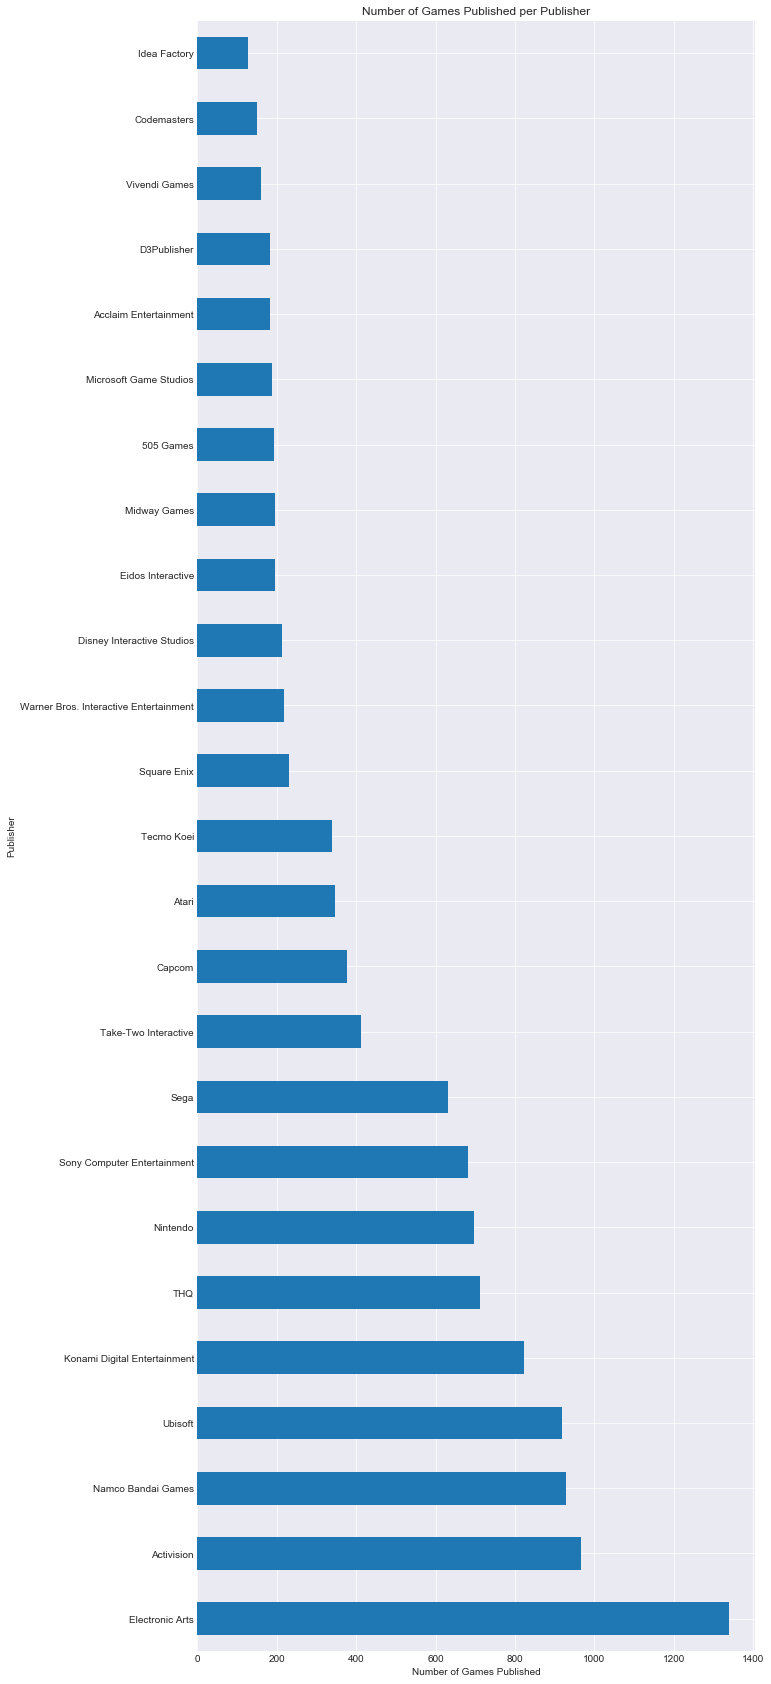

In [283]:
ax = clean_df.Publisher.value_counts().head(25).plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Number of Games Published per Publisher")
ax.set_xlabel("Number of Games Published")
ax.set_ylabel("Publisher")

Interestingly, though the top ten best-selling games per region were mostly developed by Nintendo, American publishers such as EA, Activision, and Ubisoft actually published the largest numbers of games included in the dataset. However, several Japanese publishers, such as Namco Bandai, Konami, and Nintendo also took the top spots.

The number of published games per year is also examined for any emergent trends.

In [284]:
clean_df.Year.value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     744
2005     936
2006    1008
2007    1201
2008    1428
2009    1431
2010    1257
2011    1136
2012     655
2013     546
2014     580
2015     614
2016     342
2017       3
2020       1
Name: Year, dtype: int64

Text(0, 0.5, 'Year')

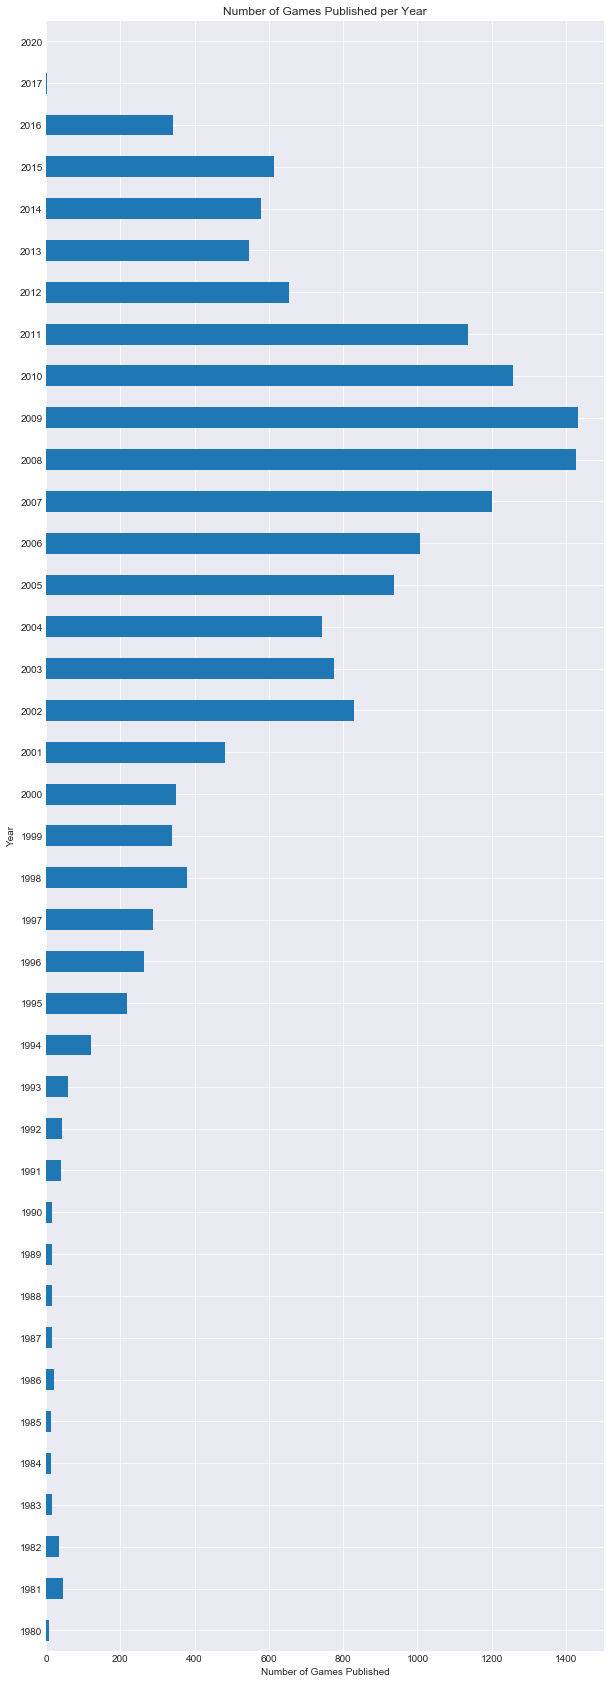

In [285]:
ax = clean_df.Year.value_counts().sort_index().plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Number of Games Published per Year")
ax.set_xlabel("Number of Games Published")
ax.set_ylabel("Year")

As highlighted in the above graph, majority of the games included in the dataset were published in the 2000s, with notably large amounts of games having been published from 2007 to 2011.

While comparing these data based on the number of published games may serve to characterize the relative productivities and growths of certain platforms, years, genres, and publishers to some degree, their respective total sales may be a better metric for their commercial success. Thus, the aforementioned four columns are also examined and visualized relative to their total global sales; visualizations involving their total sales per region are included in the data visualization section.

In [286]:
clean_df.groupby('Platform').aggregate({'Global_Sales':['sum']})

,Global_Sales
,sum
Platform,
2600,86.57
3DO,0.10
3DS,246.27
DC,15.97
DS,818.91
GB,254.42
GBA,305.62
GC,197.14


Text(0, 0.5, 'Platform')

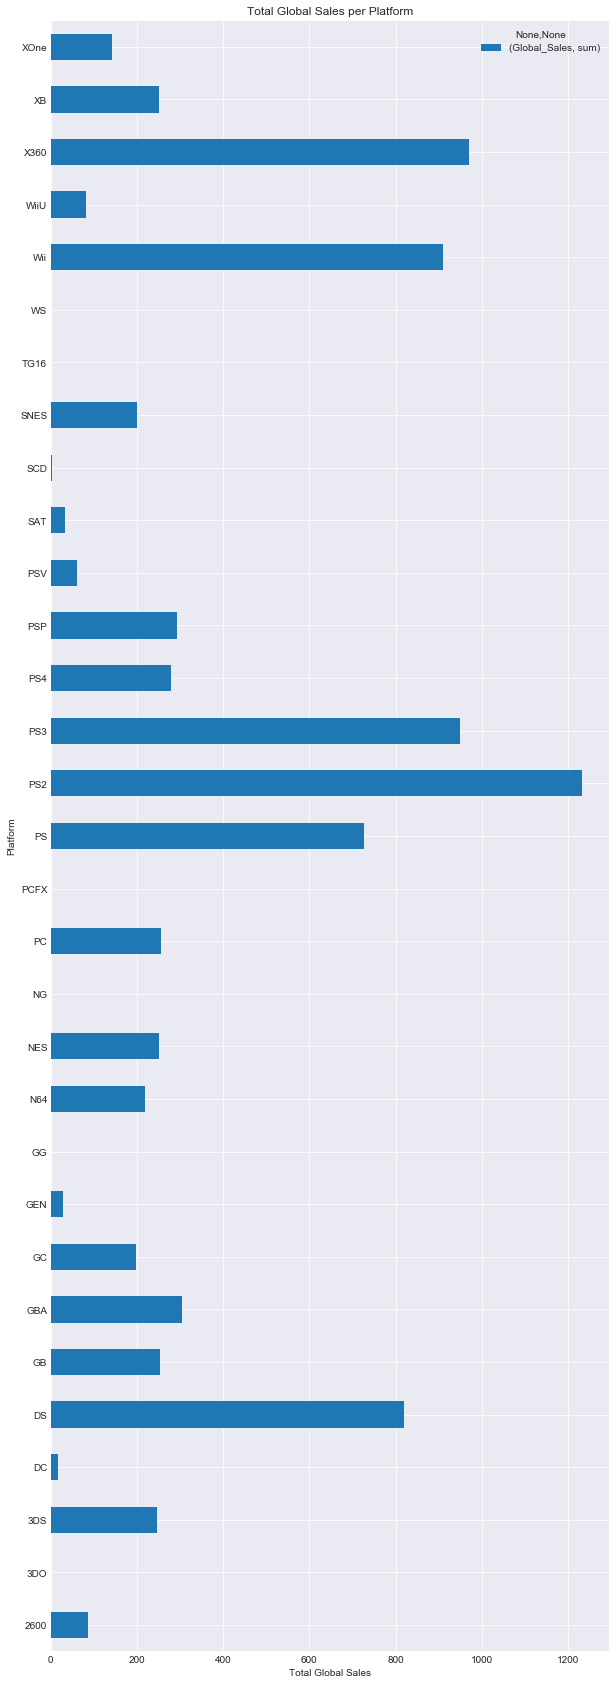

In [287]:
ax = clean_df.groupby('Platform').aggregate({'Global_Sales':['sum']}).plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Total Global Sales per Platform")
ax.set_xlabel("Total Global Sales")
ax.set_ylabel("Platform")

The top five platforms with the highest total global sales are the PS2 and PS3, the X360, the Wii, and the DS. The top four highest-selling platforms are home video game consoles, while the DS is the only handheld console among the top five. Moreover, four of these platforms were developed by Japanese companies (namely Sony's PlayStation series and Nintendo's Wii and DS); the Xbox 360 is the only American console among the top five, having been developed by Microsoft.

In [288]:
clean_df.groupby('Year').aggregate({'Global_Sales':['sum']})

,Global_Sales
,sum
Year,
1980,11.38
1981,35.77
1982,28.86
1983,16.79
1984,50.36
1985,53.94
1986,37.07
1987,21.74


Text(0, 0.5, 'Year')

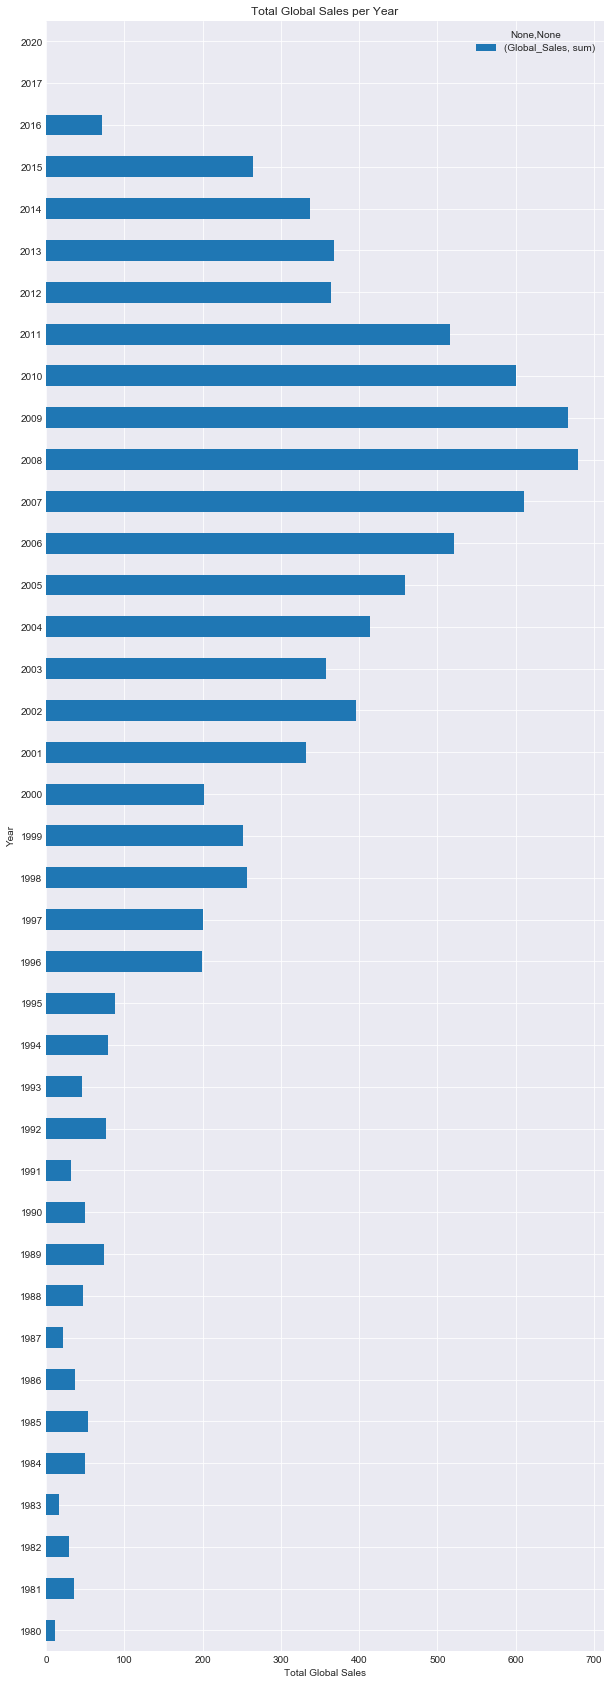

In [289]:
ax = clean_df.groupby('Year').aggregate({'Global_Sales':['sum']}).plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Total Global Sales per Year")
ax.set_xlabel("Total Global Sales")
ax.set_ylabel("Year")

The trend of total global sales over the years follows the earlier trend of numbers of video games published over the years, with the highest total global sales recorded from 2007 to 2011.

In [290]:
clean_df.groupby('Genre').aggregate({'Global_Sales':['sum']})

,Global_Sales
,sum
Genre,
Action,1722.84
Adventure,234.59
Fighting,444.05
Misc,789.87
Platform,829.13
Puzzle,242.21
Racing,726.76
Role-Playing,923.83


Text(0, 0.5, 'Genre')

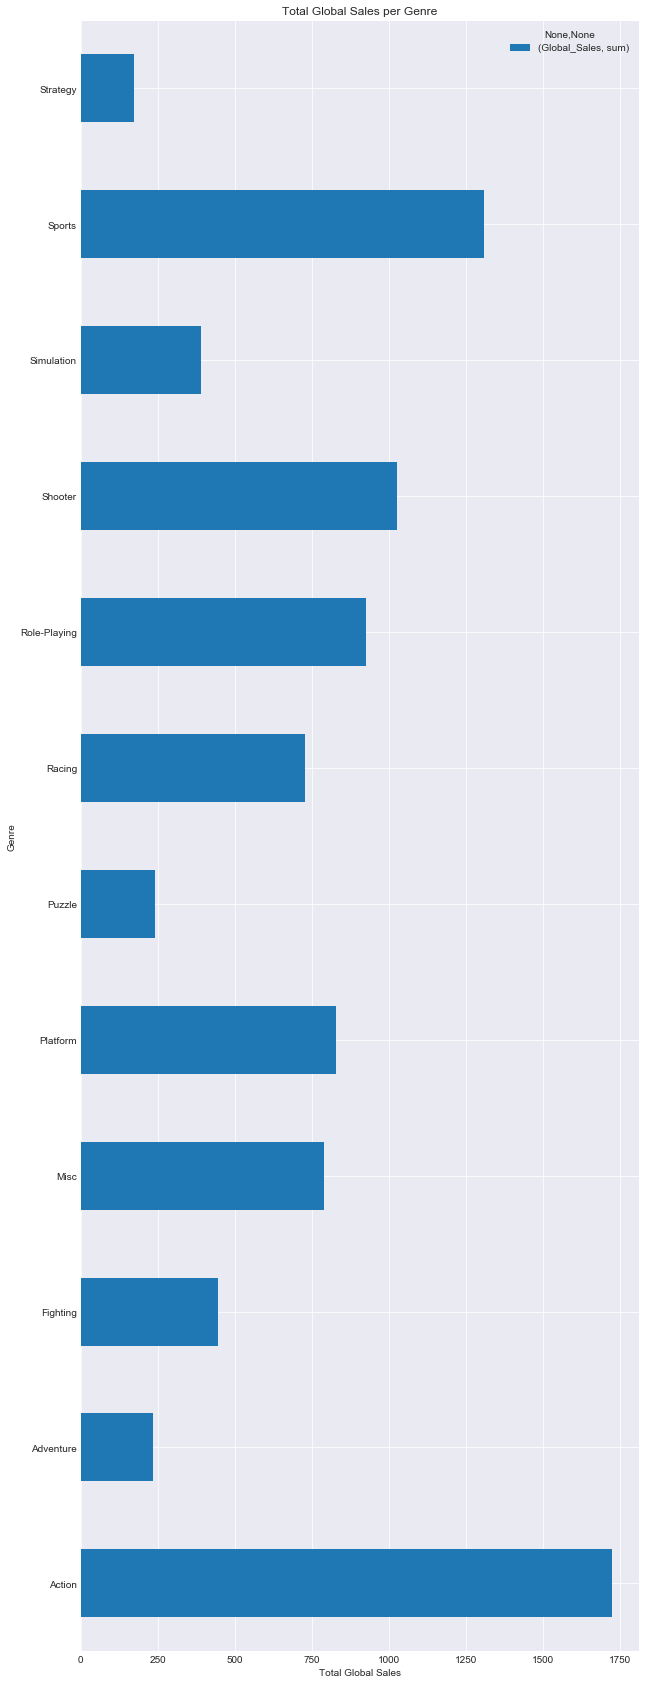

In [291]:
ax = clean_df.groupby('Genre').aggregate({'Global_Sales':['sum']}).plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Total Global Sales per Genre")
ax.set_xlabel("Total Global Sales")
ax.set_ylabel("Genre")

Similarly, the action and sports genres dominate both the total global sales and numbers of video games published. In contrast to the comparison based on numbers of games published, however, the role-playing and platform genres also recorded higher sales than miscellaneous games, indicating higher sales even with fewer available titles.

In [292]:
dummy = clean_df.groupby('Publisher').aggregate({'Global_Sales':['sum']})
dummy.columns = ['Global_Sales']
dummy = dummy.sort_values(by = 'Global_Sales', ascending = False)
dummy.head(25)

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70


Text(0, 0.5, 'Publisher')

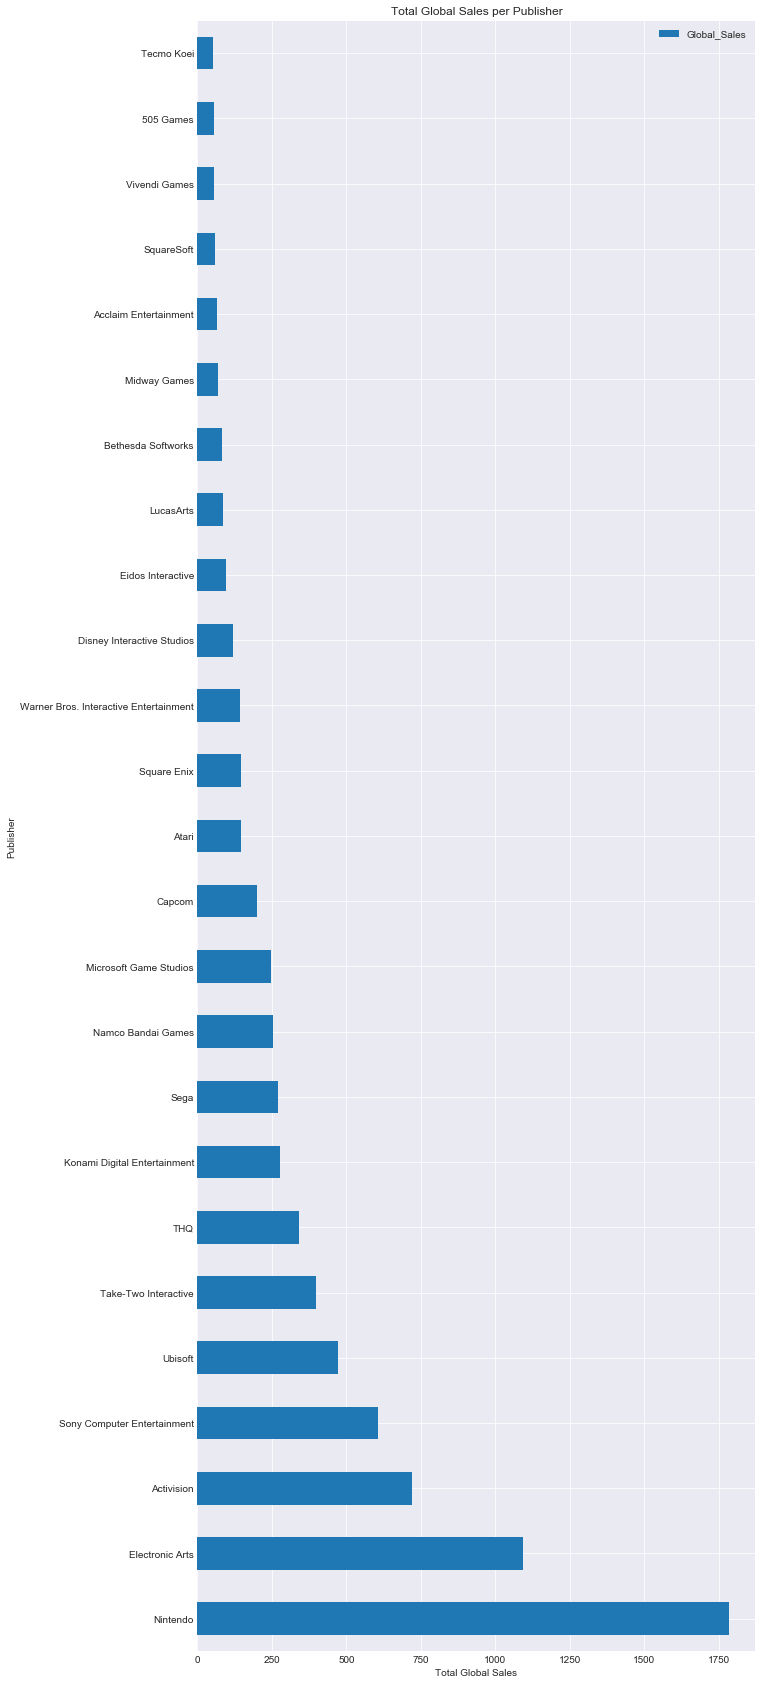

In [293]:
ax = dummy.head(25).plot(kind = 'barh', figsize = (10, 30), width = 0.50)

ax.set_title("Total Global Sales per Publisher")
ax.set_xlabel("Total Global Sales")
ax.set_ylabel("Publisher")

While most of the top publishers based on number of games published are also present in the above graph, most of their relative rankings have shifted; for instance, Nintendo has the highest global sales, about 33% more than those of EA, which in turn also has significantly higher sales compared to Activision. Similar to the trends based on number of video games published, most of the top publishers based on total global sales are also either Japanese or American companies. 

## Data Visualization

Between the two metrics for comparison used in the above section (i.e., number of video games published and total sales), total sales appears to be more indicative of a video game's commercial success. Thus, though the analyses using numbers of video games published were helpful in determining trends and characteristics in the data, the visualizations in this section focus on comparisons using the total sales of the games, both globally and for select regions.

First, the total sales based on platforms are presented using a pie plot.

In [294]:
salesbyplatform = clean_df.groupby('Platform').aggregate({'Global_Sales':['sum']})
salesbyplatform.columns = ['Global_Sales']
dictionary = salesbyplatform['Global_Sales'].to_dict()

In [295]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 300) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

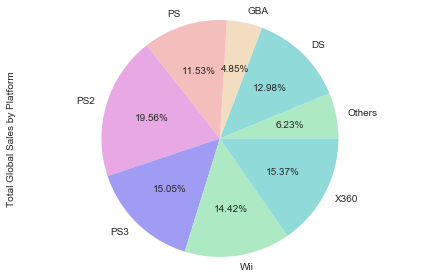

In [296]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Global Sales by Platform')

plt.tight_layout()
plt.show()

In the above visualization, the platforms with total global sales of 300 and above are shown in a pie chart (displaying the sales of all platforms in a single chart would yield 31 divisions, greatly obfuscating the visualization), while platforms with sales below 300 are collated under the "Others" division.

Globally, the platforms yielding the highest sales are the PS2, making up about a fifth of all sales, followed by the X360, PS3, and the Wii, each contributing about 15% of sales. The DS and PlayStation, meanwhile, contribute less, at 13% and 11% respectively.

The total sales for each of the regions (i.e., North America, the EU, Japan, and the rest of the world) are also visualized accordingly.

In [297]:
salesbyplatform = clean_df.groupby('Platform').aggregate({'NA_Sales':['sum']})
salesbyplatform.columns = ['NA_Sales']
dictionary = salesbyplatform['NA_Sales'].to_dict()

In [298]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 300) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

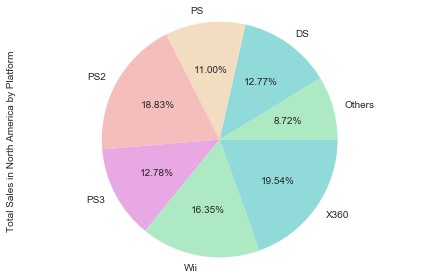

In [299]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in North America by Platform')

plt.tight_layout()
plt.show()

In North America, the X360 makes up the highest contribution to sales at about 20%, though this was still closely followed by the PS2 at 19%. Similarly, the Wii makes up over 16% of North American sales. However, the PS3, DS, and PlayStation contributed similar amounts at around 11% to 13%. In comparison to the global sales, North American sales appear to favor American platforms over Japanese platforms.

In [300]:
salesbyplatform = clean_df.groupby('Platform').aggregate({'EU_Sales':['sum']})
salesbyplatform.columns = ['EU_Sales']
dictionary = salesbyplatform['EU_Sales'].to_dict()

In [301]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 200) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

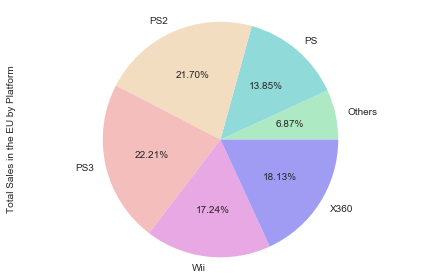

In [302]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in the EU by Platform')

plt.tight_layout()
plt.show()

Interestingly, video game sales are significantly lower in the EU, with only the PS2 and PS3 exceeding total sales of 300; to create a meaningful visualization, the threshold for collating platforms into the "Others" category was decreased to 200. For EU sales, the PS3 and PS2 were the largest contributors at over 20% each, while the X360 and Wii each contribute about 17% to 18%. Finally, the PlayStation also yields a significant contribution of roughly 14%. In contrast to the earlier data, the DS does not appear to be a major platform in the EU, making its top platforms exclusively home video game consoles.

In [303]:
salesbyplatform = clean_df.groupby('Platform').aggregate({'JP_Sales':['sum']})
salesbyplatform.columns = ['JP_Sales']
dictionary = salesbyplatform['JP_Sales'].to_dict()

In [304]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 100) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

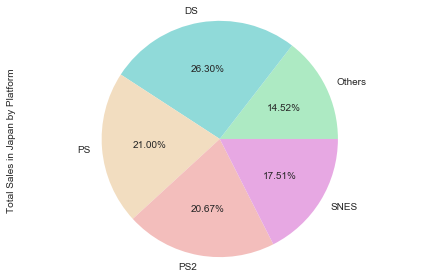

In [305]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in Japan by Platform')

plt.tight_layout()
plt.show()

Video game sales in Japan were even less than those in North America and the EU, with none of their platforms reaching total sales of 200; thus, the threshold between significant platforms and those collated under "Others" was further decreased to 100 for this visualization. In comparison to the previous data, several of the major platforms in other regions, such as the Wii and X360, do not appear to be major platforms in Japan. Moreover, its largest sales platform is the handheld DS, making up over a fourth of all sales. This was followed by the PlayStation, the PS2, and the SNES, an old home console that was not a major platform in any of the other regions. Moreover, all major platforms in Japan were developed by Japanese companies, namely Nintendo and Sony.

In [306]:
salesbyplatform = clean_df.groupby('Platform').aggregate({'Other_Sales':['sum']})
salesbyplatform.columns = ['Other_Sales']
dictionary = salesbyplatform['Other_Sales'].to_dict()

In [307]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 50) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

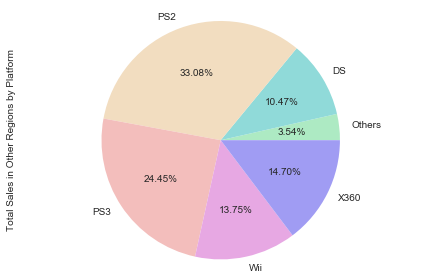

In [308]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in Other Regions by Platform')

plt.tight_layout()
plt.show()

Compared to the three named regions, total sales for other regions was even lower, with only the PS2 and PS3 exceeding sales of 100; thus, the threshold for this visualization was lowered to 50. Similar to the global, NA, and EU sales, the major platforms are the PS2 and PS3, contributing about a third and a fourth of total sales respectively, followed by the X360 and the Wii with around 15% of the total sales, and the DS with around 10% of the total sales. 

Next, the total sales based on genre are also presented using pie plots.

In [309]:
salesbygenre = clean_df.groupby('Genre').aggregate({'Global_Sales':['sum']})
salesbygenre.columns = ['Global_Sales']
dictionary = salesbygenre['Global_Sales'].to_dict()

In [311]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 300) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

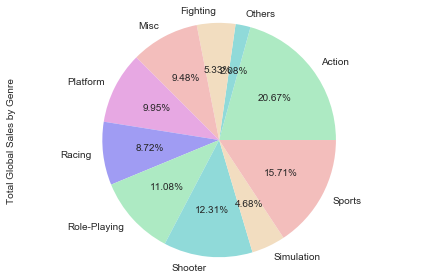

In [312]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Global Sales by Genre')

plt.tight_layout()
plt.show()

Globally, action and sports games are the largest sales contributors, at over 20% and 15%, respectively. This is followed by shooter and role-playing games with contributions of 12% and 11%, then by platform, miscellaneous, and racing games, each contributing under 10% of sales. Finally, fighting games and simulation games each contribute around 5% to total sales.

In [313]:
salesbygenre = clean_df.groupby('Genre').aggregate({'NA_Sales':['sum']})
salesbygenre.columns = ['NA_Sales']
dictionary = salesbygenre['NA_Sales'].to_dict()

In [316]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 100) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

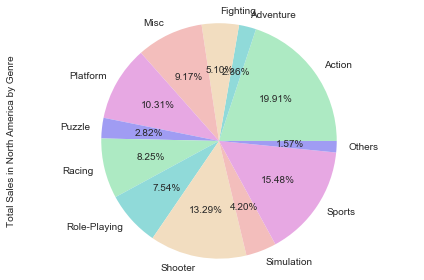

In [317]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in North America by Genre')

plt.tight_layout()
plt.show()

Similarly, in North America, action and sports games contribute the greatest amount to sales, followed by shooter games. In contrast to global sales, however, the fourth-largest sales contributor in North America is the platform genre, followed by miscellaneous, racing, and role-playing games, then by fighting and simulation games. 

In [318]:
salesbygenre = clean_df.groupby('Genre').aggregate({'EU_Sales':['sum']})
salesbygenre.columns = ['EU_Sales']
dictionary = salesbygenre['EU_Sales'].to_dict()

In [319]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 100) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

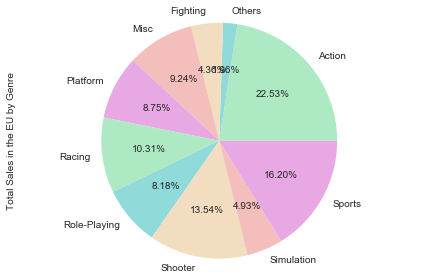

In [320]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in the EU by Genre')

plt.tight_layout()
plt.show()

Similar to the global and North American sales, the largest sales contributors in the EU are the action, sports, and shooter genres. However, the succeeding genres, namely racing, miscellaneous, platform, and role-playing games, all contribute similar amounts to total sales. Similar to the trend in global sales, the fighting and simulation genres each contribute about 5% to total sales.

In [321]:
salesbygenre = clean_df.groupby('Genre').aggregate({'JP_Sales':['sum']})
salesbygenre.columns = ['JP_Sales']
dictionary = salesbygenre['JP_Sales'].to_dict()

In [322]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 50) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

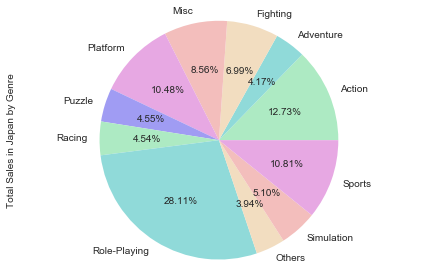

In [323]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in Japan by Genre')

plt.tight_layout()
plt.show()

Once again, sales in Japan exhibited a different trend, with role-playing games making up over a fourth of all video game sales in the region. Meanwhile, the action, sports, and platform genres each make up only around 10%, while the miscellaneous, fighting, simulation, puzzle, racing, and adventure genres contribute even less. Notably, the shooter genre does not appear to be popular in Japan.  

In [324]:
salesbygenre = clean_df.groupby('Genre').aggregate({'Other_Sales':['sum']})
salesbygenre.columns = ['Other_Sales']
dictionary = salesbygenre['Other_Sales'].to_dict()

In [325]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 50) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

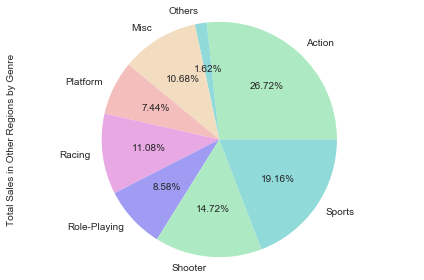

In [326]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in Other Regions by Genre')

plt.tight_layout()
plt.show()

The total sales in other regions also follows the established trend, with action, sports, and shooter games yielding the top three highest sales contributions. The racing, role-playing, platform, and miscellaneous genres are also major contributors, while the fighting and simulation genres contribute significantly less (hence their relegation to the "Others" division in the visualization).

The total sales based on publishers are then visualized.

In [327]:
salesbypub = clean_df.groupby('Publisher').aggregate({'Global_Sales':['sum']})
salesbypub.columns = ['Global_Sales']
dictionary = salesbypub['Global_Sales'].to_dict()

In [328]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 300) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

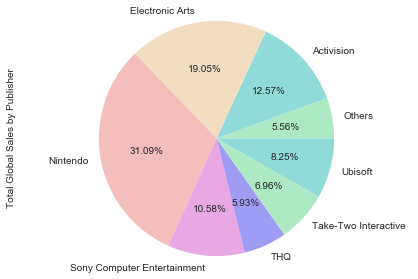

In [329]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Global Sales by Publisher')

plt.tight_layout()
plt.show()

Globally, Nintendo yields the highest contribution to sales at over 30%, followed by EA and Activision. Other companies such as Sony and Ubisoft contribute around 10% to sales, while Take-Two interactive and THQ make up about 5% of total global sales. Notably, except for Nintendo and Sony, all major global publishers are American companies.

In [330]:
salesbypub = clean_df.groupby('Publisher').aggregate({'NA_Sales':['sum']})
salesbypub.columns = ['NA_Sales']
dictionary = salesbypub['NA_Sales'].to_dict()

In [331]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 200) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

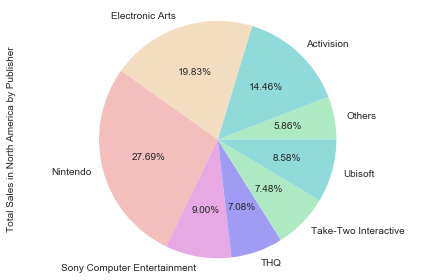

In [332]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in North America by Publisher')

plt.tight_layout()
plt.show()

North American sales follow the global trend, with Nintendo, EA, and Activision being the top three publishers. Other major publishers include Sony, Ubisoft, Take-Two, and THQ, each contributing from 7% to 9% to the total sales.

In [333]:
salesbypub = clean_df.groupby('Publisher').aggregate({'EU_Sales':['sum']})
salesbypub.columns = ['EU_Sales']
dictionary = salesbypub['EU_Sales'].to_dict()

In [334]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 100) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

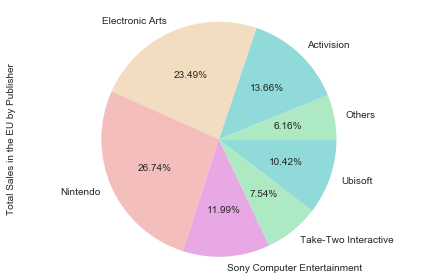

In [336]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in the EU by Publisher')

plt.tight_layout()
plt.show()

The trend also holds for sales in the EU; the top three contributors are Nintendo, EA, and Activision, followed by Sony, Ubisoft, and Take-Two. However, THQ no longer appears as a major publisher in the EU, as it had been relegated to the "Others" division which contributed only 6% to sales, in contrast to Take-Two which contributed about 8%.

In [337]:
salesbypub = clean_df.groupby('Publisher').aggregate({'JP_Sales':['sum']})
salesbypub.columns = ['JP_Sales']
dictionary = salesbypub['JP_Sales'].to_dict()

In [338]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 50) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

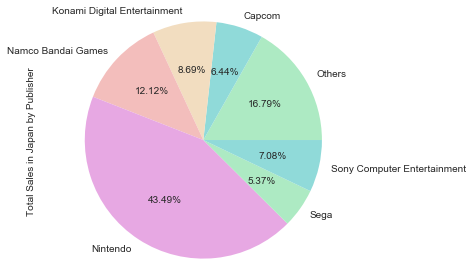

In [339]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in Japan by Publisher')

plt.tight_layout()
plt.show()

Sales in Japan once again break away from the trend, with all of its major publishers being Japanese companies. Moreover, Nintendo alone makes up more than half of the total sales in Japan; the succeeding major publisher, Namco Bandai, only contributes about 12%. As previously stated, its other major publishers (i.e., Konami, Sony, Capcom, and Sega) are all Japanese companies. Furthermore, non-major publishers still contribute a significant amount to Japanese sales, making up over 16% of total sales; in contrast, non-major publishers in North America, the EU, and on a global scale only make up at most 6% of sales in their respective regions.

In [340]:
salesbypub = clean_df.groupby('Publisher').aggregate({'Other_Sales':['sum']})
salesbypub.columns = ['Other_Sales']
dictionary = salesbypub['Other_Sales'].to_dict()

In [341]:
import itertools
cleaned = {}
for key, group in itertools.groupby(dictionary, lambda k: 'Others' if (dictionary[k] < 50) else k):
    cleaned[key] = sum([dictionary[k] for k in list(group)])
    
labels = cleaned.keys()
sizes = cleaned.values()

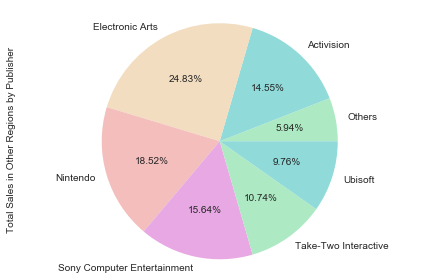

In [342]:
fig, ax = plt.subplots()

ax.pie(sizes, labels = labels, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3'])
ax.axis('equal')
ax.set_ylabel('Total Sales in Other Regions by Publisher')

plt.tight_layout()
plt.show()

Notably, although Nintendo, EA, and Activision are still the top three major publishers in other regions, EA appears to be the top publisher, contributing to around a fourth of the total sales in contrast to Nintendo's contribution of less than 20%. Similar to the general trend, Sony, Take-Two, and Ubisoft are also major publishers, while THQ was also relegated to the "Others" division.

Finally, the trends in the total sales of different regions over the years are visualized using line graphs.

In [343]:
salesbyyear = clean_df.groupby('Year').aggregate({'Global_Sales':['sum']})
salesbyyear.columns = ["Global Sales"]

(1980, 2020)

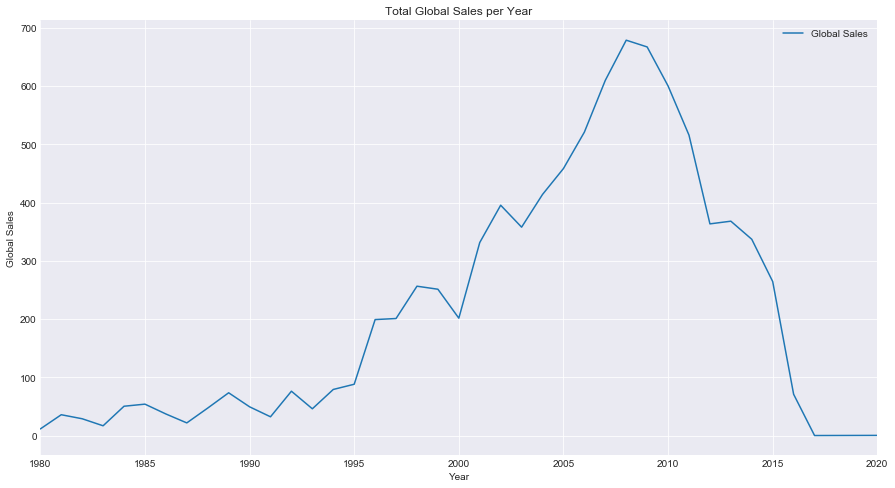

In [344]:
ax = salesbyyear.plot(kind = 'line', figsize = (15, 8))

ax.set_title('Total Global Sales per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Global Sales')
ax.set_xlim(1980, 2020)

As mentioned in the data analysis section, global sales exhibited a sudden boom during the 2000s, spiking at around 2007 and dying down from about 2011 onwards. Before this boom, a smaller sudden increase in sales also occurred from 1995 to 2000, which tapered momentarily before leading to the 2000s increase. From 1980 to 1995, several peaks in sales also appeared, though these appear negligible compared to the 2007 to 2011 data. Lastly, the year 2020 recorded the lowest sales, though this may be due to the sales data for 2020 being incomplete when the data was gathered (e.g., the dataset was based on old data or was completed before all sales for 2020 had been processed and published). 

In [345]:
salesbyyear = clean_df.groupby('Year').aggregate({'NA_Sales':['sum']})
salesbyyear.columns = ["Sales in North America"]

(1980, 2020)

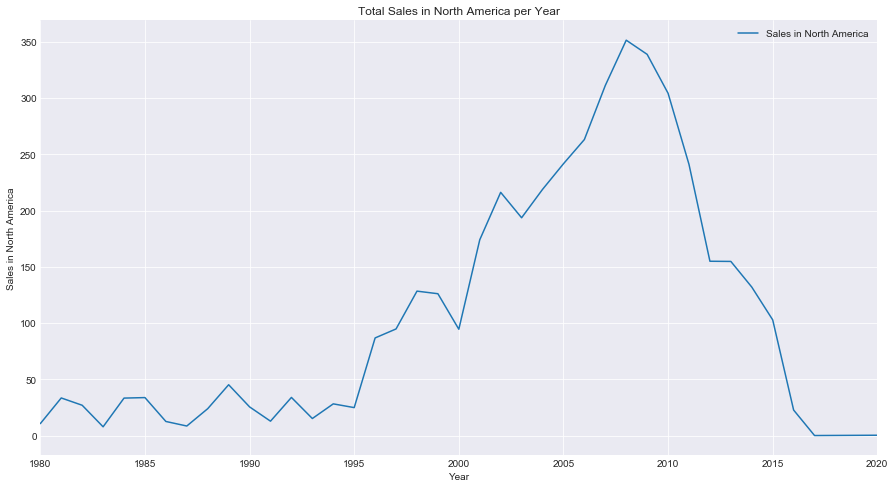

In [346]:
ax = salesbyyear.plot(kind = 'line', figsize = (15, 8))

ax.set_title('Total Sales in North America per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Sales in North America')
ax.set_xlim(1980, 2020)

Based on the visualization, North American sales followed the global trend, with several peaks occurring before 1995 and the sudden increases in sales occurring from 1995 to 2000 and during the 2000s. 

In [347]:
salesbyyear = clean_df.groupby('Year').aggregate({'EU_Sales':['sum']})
salesbyyear.columns = ["Sales in the EU"]

(1980, 2020)

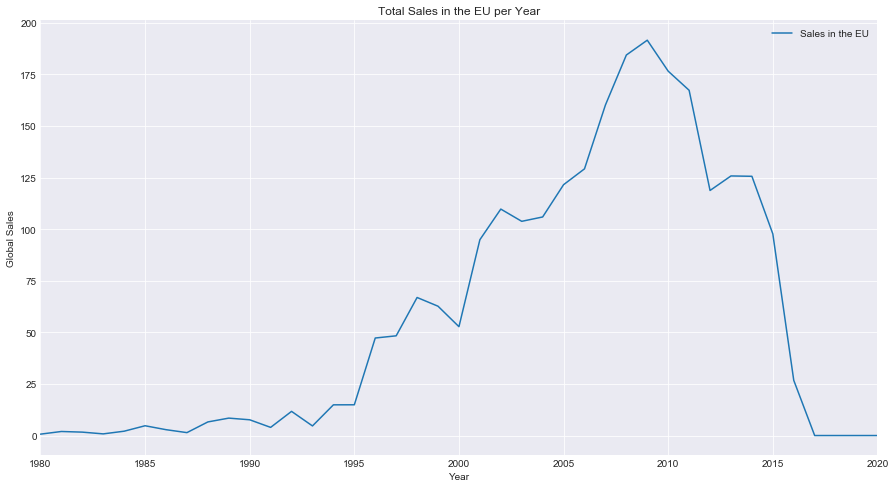

In [348]:
ax = salesbyyear.plot(kind = 'line', figsize = (15, 8))

ax.set_title('Total Sales in the EU per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Global Sales')
ax.set_xlim(1980, 2020)

In contrast to the global and North American trends, video game sales in the EU were consistently low before 1995. Though EU sales also exhibited the peaks from 1995 to 2000 and during the 2000s, the increase in sales leading to the two peaks appeared to be slower compared to the increases in sales in the global and North American sales data.

In [349]:
salesbyyear = clean_df.groupby('Year').aggregate({'JP_Sales':['sum']})
salesbyyear.columns = ["Sales in Japan"]

(1980, 2020)

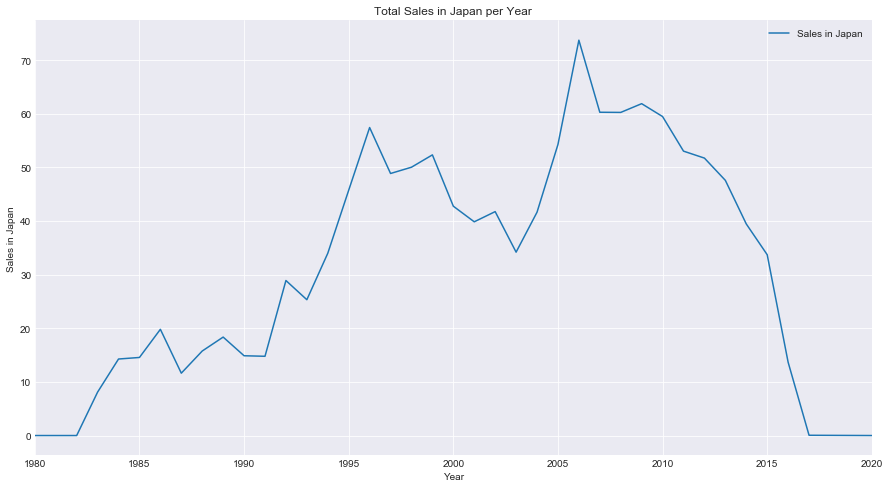

In [350]:
ax = salesbyyear.plot(kind = 'line', figsize = (15, 8))

ax.set_title('Total Sales in Japan per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Sales in Japan')
ax.set_xlim(1980, 2020)

Again contrasting with the established trend, video game sales in Japan exhibited a steady increase from around 1982 onwards, although there were also some peaks and declines in their sales during this period. Their first major spike in sales occurred before 1995 and lasted until around 2004, with its peak occurring past 1995. Subsequently, Japanese video game sales spiked again from around 2004 to 2015, peaking in about 2006; afterwards, video game sales experienced a sharp decline, possibly owing to the popularization of games on other platforms such as mobile or arcade games, which were not included in the data.

In [351]:
salesbyyear = clean_df.groupby('Year').aggregate({'Other_Sales':['sum']})
salesbyyear.columns = ["Sales in Other Regions"]

(1980, 2020)

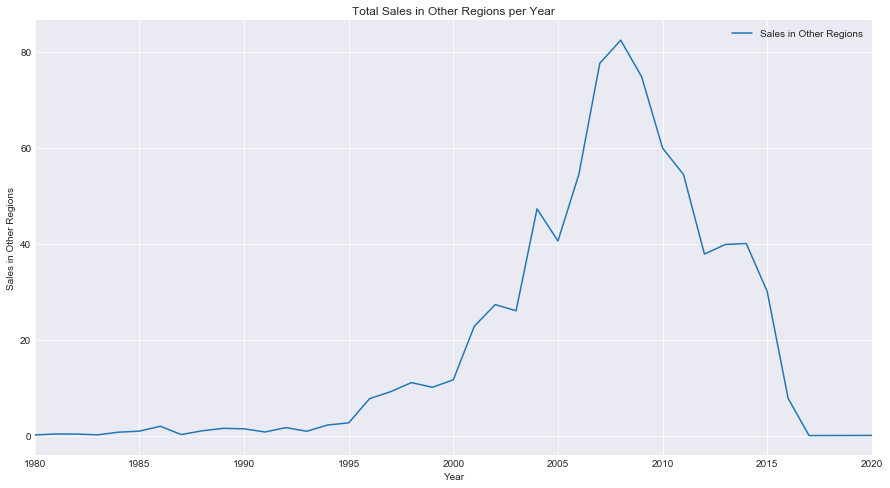

In [352]:
ax = salesbyyear.plot(kind = 'line', figsize = (15, 8))

ax.set_title('Total Sales in Other Regions per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Sales in Other Regions')
ax.set_xlim(1980, 2020)

Finally, video game sales in other regions exhibited a similar trend to the sales in the EU, with consistently low sales before 1995 and two peaks starting from 1995 and the early 2000s. However, the increase in sales from 1995 to 2000 was much slower, and this was also part of a general increase continuing until 2004, where sales exhibited a sudden spike before slightly declining in 2005. The final major spike in video game sales occurred at around 2007, though the drop in sales afterwards appeared more sudden as well. Video game sales experienced the last significant decrease starting from about 2014, declining sharply until the year 2020.